In [1]:
# Jessica Gallo
# Created: 9/18/2020
# Last modified: 9/28/2020
# Neural Networks & Deep Learning
# HW#1 Descriptive Statistics, Classification and Analysis Using 
# Python & Python Libraries
# Part 2

In [2]:
# ----------------
# Setting up GPU |
# ---------------

# anaconda prompt: activate tensorflow

from tensorflow.python.client import device_lib

# Checks to see available devices (CPU and GPU)
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

# Configures GPU Usage
print("Num GPUs Available: ", 
      len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# Imports
# Data Preprocessing
from pandas import concat
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing
# listing 6
from pandas import read_csv
from pandas import set_option  # Pairwise Pearson Corr
from matplotlib import pyplot  # Histograms/Density/Box & Whisker/Correlation Matrix
import numpy  # Correlation Matrix
# listing 7
from numpy import set_printoptions  # Rescaling/Standardize/Normalize/Binarize
from sklearn.preprocessing import MinMaxScaler, Binarizer  # Rescaling
from sklearn.preprocessing import StandardScaler  # Standardize
from sklearn.preprocessing import Normalizer  # Normalize
import pandas as pd

In [5]:
# ----------------------
# Wine Quality DATASET |
# ---------------------

filename = "./Downloads/winequalityN.csv"  # csv/text file
# names = ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
#          'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']  # columns on dataset
# data = read_csv(filename, names=names)  # reads the info on csv/txt file
dataSetCsv = pd.read_csv(filename, ',', error_bad_lines=False) #, names=names)
dataset = pd.DataFrame(dataSetCsv)

print('Original Dataset:\n'
     '-----------------')
dataset.head(10)

Original Dataset:
-----------------


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [6]:
# ===========================================================================
# Data Preprocessing
# ===========================================================================

In [7]:
types = dataset.select_dtypes(include=[object])
# takes out object type columns

print('Type Column:\n'
     '------------')
print(types.head(3), '\n')
print(types.tail(3))

Type Column:
------------
    type
0  white
1  white
2  white 

     type
6494  red
6495  red
6496  red


In [8]:
print(types.shape)
# displays types column shape
print(types.columns)
# shows types column is still an object datatype

(6497, 1)
Index(['type'], dtype='object')


In [9]:
le = preprocessing.LabelEncoder()
types_num = types.apply(le.fit_transform)
# use label encorder to change white -> 1 and red-> 0

print(types_num.head(3),'\n') # shows the first 3 rows that have type=white
print(types_num.tail(3)) # shows the last 3 rows that have type=red

   type
0     1
1     1
2     1 

      type
6494     0
6495     0
6496     0


In [10]:
df = concat([types_num, dataset], axis=1)
# shows concatonated datasets with both label encoded type column and object type column

print('Concatinated Dataset with both type columns:\n'
     '--------------------------------------------')
df.head(3)

Concatinated Dataset with both type columns:
--------------------------------------------


,type,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [11]:
df.columns = ['type', 'char_type', 'fixed acidity', 'volatile acidity', 
              'citric acid', 'residual sugar', 'chlorides', 
              'free sulfur dioxide', 'total sulfur dioxide', 'density', 
              'pH', 'sulphates', 'alcohol', 'quality']
# changed name of object type column

print('Dataset with new column name:\n'
     '-----------------------------')
df.head(3)

Dataset with new column name:
-----------------------------


,type,char_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [12]:
df.drop(['char_type'], axis=1, inplace=True)
# drops the char_type or object type column
# all columns are numeric now
# inplace=True permanantely takes out the column 

print('All numeric dataset:\n'
     '--------------------')
df.head(3)

All numeric dataset:
--------------------


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [13]:
df.isnull().sum().sum() 
# shows there are missing values labeled NaN

38

In [14]:
df.fillna(0, inplace=True)
# replaces Nan values with 0
df.isnull().sum().sum()
# no more Nan values

0

In [15]:
df.shape

(6497, 13)

In [16]:
# =============================================================================
# Listing 6
# =============================================================================

In [17]:
# ------------------------------
# Pairwise Pearson Correlation |
# -----------------------------

set_option('display.width', 100)  # width of the display in characters
set_option('precision', 3)  # sets number of digits
correlations = df.corr(method='pearson')  # corr() function to calculate correlation matrix
print("Pairwise Pearson Correlction of Wine Quality Dataset:")
print(correlations)

Pairwise Pearson Correlction of Wine Quality Dataset:
                       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
type                  1.000         -0.477            -0.652        0.187           0.349   
fixed acidity        -0.477          1.000             0.213        0.321          -0.111   
volatile acidity     -0.652          0.213             1.000       -0.378          -0.195   
citric acid           0.187          0.321            -0.378        1.000           0.142   
residual sugar        0.349         -0.111            -0.195        0.142           1.000   
chlorides            -0.513          0.293             0.376        0.039          -0.129   
free sulfur dioxide   0.472         -0.275            -0.352        0.133           0.403   
total sulfur dioxide  0.700         -0.322            -0.415        0.195           0.495   
density              -0.391          0.449             0.271        0.096           0.552   
pH              

In [18]:
# -------------------------
# Skew for each Attribute |
# ------------------------

skew = df.skew()  # calculates skew of dataset
print("\nSkewness for Each Attribute of Wine Quality Dataset:")
print(skew)


Skewness for Each Attribute of Wine Quality Dataset:
type                   -1.179
fixed acidity           1.385
volatile acidity        1.482
citric acid             0.470
residual sugar          1.435
chlorides               5.395
free sulfur dioxide     1.220
total sulfur dioxide   -0.001
density                 0.504
pH                     -5.480
sulphates               1.757
alcohol                 0.566
quality                 0.190
dtype: float64



Univariable Density Plot of Wine Quality Dataset:


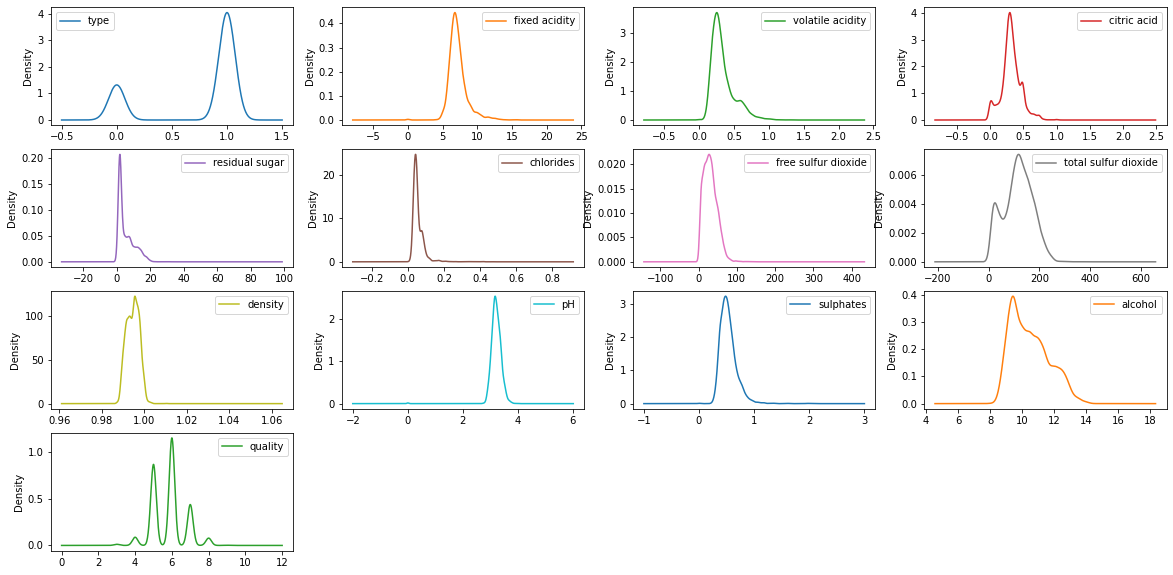

In [19]:
# -------------------------
# Univariate Denisty Plot |
# ------------------------

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(20, 10))
# subplots True: make separate subplot for each column
# sharex False: an ax is passed in
print("\nUnivariable Density Plot of Wine Quality Dataset:")
pyplot.show()  # displays the plot


Correlation Matrix Plot for Wine Quality Dataset:


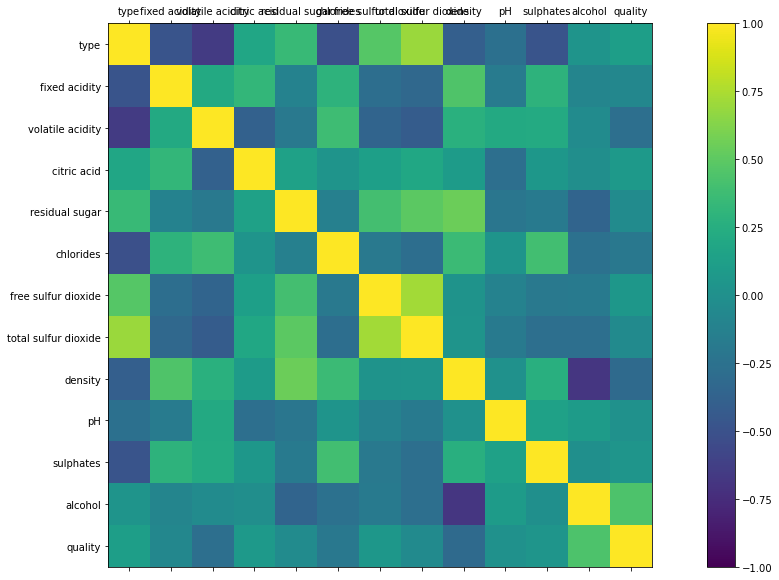

In [20]:
# -------------------------
# Correlation Matrix Plot |
# -------------------------

names = ['type', 'fixed acidity', 'volatile acidity', 
         'citric acid', 'residual sugar', 'chlorides', 
         'free sulfur dioxide', 'total sulfur dioxide', 'density', 
         'pH', 'sulphates', 'alcohol', 'quality']

fig = pyplot.figure(figsize=(20, 10))
ax = fig.add_subplot(111)  # subplot grid parameters 1x1 grid, 1st subplot
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)  # creates colorbar on axes
ticks = numpy.arange(0,13,1)  # returns evenly spaced values within a given interval
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
print("\nCorrelation Matrix Plot for Wine Quality Dataset:")
pyplot.show()  # displays plot

In [ ]:
'''
Listing 6 Analysis:

The Pairwise Pearson Correlation which is a plot showing the strength of 
relationship or correlation between the columns, the closer to 1.00 the number 
is, the closer the relationship is. A column or variable being 1.00 means it have 
a very strong relationship. -1.00 shows that it has less of a relationship. For 
example, volatile acidity is -0.652 on type so it shows that volatile acidity has 
very little relation to type. Also, total sulfur dioxide is 0.700 on type, which 
means it which means that total sulfur dioxide has a close relationship to type. 

For skewness of attributes, which is a measure of asymmetry of a distribution, 
it shows that type and pH are highly skewed since skewness is greater than -1; 
fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, 
citric acid and sulphates are also highly skewed because skewness is greater 
than +1; total sulfur dioxide and quality are approximately symmetric in 
distribution since skewness is between -1/2 and +1/2; and density and alcohol are 
moderately skewed since skewness is between +1/2 and +1.

For the univariate density plot, which is the distribution of a variable in a 
dataset plotted on a continuous interval, it shows that there is more white wine 
than red wine, fixed acidity is greatest at about 6 and ends at 10, volatile 
acidity is greatest around 0.3 and drops and ends at 1.0, citric acid is greatest 
at 0.3 but starts increasing at around 0.0 and drops at 0.8, residual sugar is 
greatest at 0 and ends at 20, chlorides is greatest at 0.0 and drops and ends at 
0.1, free sulfur dioxide is greatest at 0 and drops at about 80, total sulfur 
dioxide starts at 0 and is greatest at about 150 and drops at around 230, density 
starts at 0.99 and is greatest at 0.999 and drops at 1.00, pH is greatest at 3, 
sulphates is greatest at 0.5, alcohol is greatest at 9.5 and drop and ends at 14 
with a little fluctuation, quality fluctuates a lot from 4 to 8 and is greatest 
at 6. 

For the correlation matrix plot, which is a plot showing the strength of relationship
or correlation between the columns, the closer to yellow (or 1.00) the color is, the 
closer the relationship is. The diagonal yellow boxes are represent each column being 
obviously fully related to each other. The darker or bluer (-1.00) the color, the less 
it has in relationship. For example, volatile acidity is dark blue on type so it shows 
that volatile acidity has no relation to type. Also, total sulfur dioxide is a very 
light green on type, which means it is closer to yellow or 1.00, which means that total 
sulfur dioxide has a close relationship to type.
'''

In [ ]:
# ===========================================================================
# Listing 7
# ===========================================================================

In [21]:
# Listing 7 data
array = df.values
# separate array into input and output components
X = array[:,0:-1]
Y = array[:,12]

In [22]:
# ----------------
# Rescaling Data |
# ---------------

min_max = MinMaxScaler(feature_range=(0,1))  # desired range of transformed data
rescaledX = min_max.fit_transform(X)  # fit to data, then transform it
set_printoptions(precision=3)  # sets number of digits
print("\nRescaling Data between 0 and 1 from Wine Quality Dataset:\n")
print(rescaledX)


Rescaling Data between 0 and 1 from Wine Quality Dataset:

[[1.    0.44  0.171 ... 0.748 0.225 0.116]
 [1.    0.396 0.19  ... 0.823 0.245 0.217]
 [1.    0.509 0.177 ... 0.813 0.22  0.304]
 ...
 [0.    0.396 0.323 ... 0.853 0.375 0.435]
 [0.    0.371 0.408 ... 0.89  0.355 0.319]
 [0.    0.377 0.196 ... 0.845 0.33  0.435]]


In [23]:
# ------------------
# Standardize Data |
# ------------------

standardize = StandardScaler().fit(X)  # standardize features by removing the mean and scaling to unit variance
rescaledX = standardize.transform(X)
set_printoptions(precision=3)  # sets number of digits
print("\nStandardize Data from Wine Quality Dataset:\n")
print(rescaledX)


Standardize Data from Wine Quality Dataset:

[[ 0.571 -0.155 -0.42  ... -1.068 -0.542 -1.419]
 [ 0.571 -0.683 -0.238 ...  0.43  -0.274 -0.832]
 [ 0.571  0.675 -0.359 ...  0.23  -0.609 -0.329]
 ...
 [-1.75  -0.683  1.035 ...  1.029  1.467  0.426]
 [-1.75  -0.984  1.853 ...  1.777  1.199 -0.245]
 [-1.75  -0.909 -0.177 ...  0.879  0.865  0.426]]


In [24]:
# ----------------
# Normalize Data |
# ---------------

normalize = Normalizer().fit(X)  # normalize samples individually to unit norm
normalizedX = normalize.transform(X)
set_printoptions(precision=3)  # sets number of digits
print("\nNormalized Data from Wine Quality Dataset:\n")
print(normalizedX)


Normalized Data from Wine Quality Dataset:

[[0.006 0.039 0.002 ... 0.017 0.003 0.05 ]
 [0.008 0.047 0.002 ... 0.025 0.004 0.071]
 [0.01  0.079 0.003 ... 0.032 0.004 0.098]
 ...
 [0.    0.123 0.01  ... 0.067 0.015 0.215]
 [0.    0.106 0.012 ... 0.064 0.013 0.183]
 [0.    0.126 0.007 ... 0.071 0.014 0.231]]


In [25]:
# ---------------
# Binarize Data |
# --------------

binarizer = Binarizer(threshold=0.0).fit(X)  # binarize data according to threshold
# threshold: feature values below or equal to this are replaced by 0, above it by 1
# fit is there to implement the usual API
binaryX = binarizer.transform(X)
set_printoptions(precision=3)  # sets number of digits
print("\nBinarized Data from Wine Quality Dataset:")
print(binaryX)


Binarized Data from Wine Quality Dataset:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]]


In [ ]:
'''
Listing 7 Analysis:

The Min-Max Scaler scales or normalizes the input features/variables. The 
features are transformed into the range [0,1], or the minimum and maximum 
value of a feature if going to be 0 and 1 respectively. Normalization scales 
each input variable separately, also in the range of 0-1. Standardization 
scales each input variable separately by subtracting the mean and dividing 
by the standard deviation to shift the distribution to have a mean of zero 
and a standard deviation of one. Binarizing the data converts the data to 0 
or 1 depending the threshold. Values below the threshold are converted to 0 
and above the threshold are converted to 1.
'''